In [1]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# To make maps
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

# To add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 

In [2]:
###############################################################################
#                              2. Version Check                              #
###############################################################################
print(f"The NetworkX package is version {nx.__version__}")
print(f"The OSMNX package is version {ox.__version__}")
print(f"The Request package is version {requests.__version__}")
#print(f"The PIL package is version {PIL.__version__}")

The NetworkX package is version 2.4
The OSMNX package is version 0.14.1
The Request package is version 2.23.0


NameError: name 'PIL' is not defined

In [4]:
###############################################################################
#                                3. Get Data                                  #
###############################################################################
# Define city/cities
places = ["Blois, France"]

# Get data for places
G = ox.graph_from_place(places, network_type = "all", simplify = True)

In [5]:
###############################################################################
#                               4. Unpack Data                                #
###############################################################################
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)  

In [6]:
data

[{'osmid': 317231911,
  'name': 'Allée de Bégon',
  'highway': 'track',
  'access': 'permissive',
  'width': '20',
  'oneway': False,
  'length': 31.844},
 {'osmid': 265602015,
  'name': 'Chemin de la Forêt',
  'highway': 'unclassified',
  'oneway': False,
  'length': 527.644,
  'geometry': <shapely.geometry.linestring.LineString at 0x7faa18efaa10>},
 {'osmid': 317231911,
  'name': 'Allée de Bégon',
  'highway': 'track',
  'access': 'permissive',
  'width': '20',
  'oneway': False,
  'length': 318.305,
  'geometry': <shapely.geometry.linestring.LineString at 0x7faa18efabd0>},
 {'osmid': 19727538,
  'name': 'Avenue du Président Wilson',
  'highway': 'secondary',
  'maxspeed': '50',
  'oneway': False,
  'length': 80.941},
 {'osmid': 19727538,
  'name': 'Avenue du Président Wilson',
  'highway': 'secondary',
  'maxspeed': '50',
  'oneway': False,
  'length': 40.853,
  'geometry': <shapely.geometry.linestring.LineString at 0x7faa19544fd0>},
 {'osmid': 158259562,
  'oneway': True,
  'name':

In [21]:
###############################################################################
#                5. Assign Each Segment a Color Based on its Length           #
###############################################################################
# List to store colors
roadColors = []

# The length is in meters
for item in data:
    if "length" in item.keys():
        
        if item["length"] <= 100:
            color = "#d40a47"
            
        elif item["length"] > 100 and item["length"] <= 200:
            color = "#e78119"
            
        elif item["length"] > 200 and item["length"] <= 400:
            color = "#30bab0"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bbbbbb"
            
        else:
            color = "w"
             
    roadColors.append(color)

In [22]:
###############################################################################
#                6. Assign Each Segment a Width Based on its type             #
###############################################################################
# List to store linewidths
roadWidths = []

for item in data:
    if "footway" in item["highway"]:
        linewidth = 1

    else:
        linewidth = 2.5
        
    roadWidths.append(linewidth)

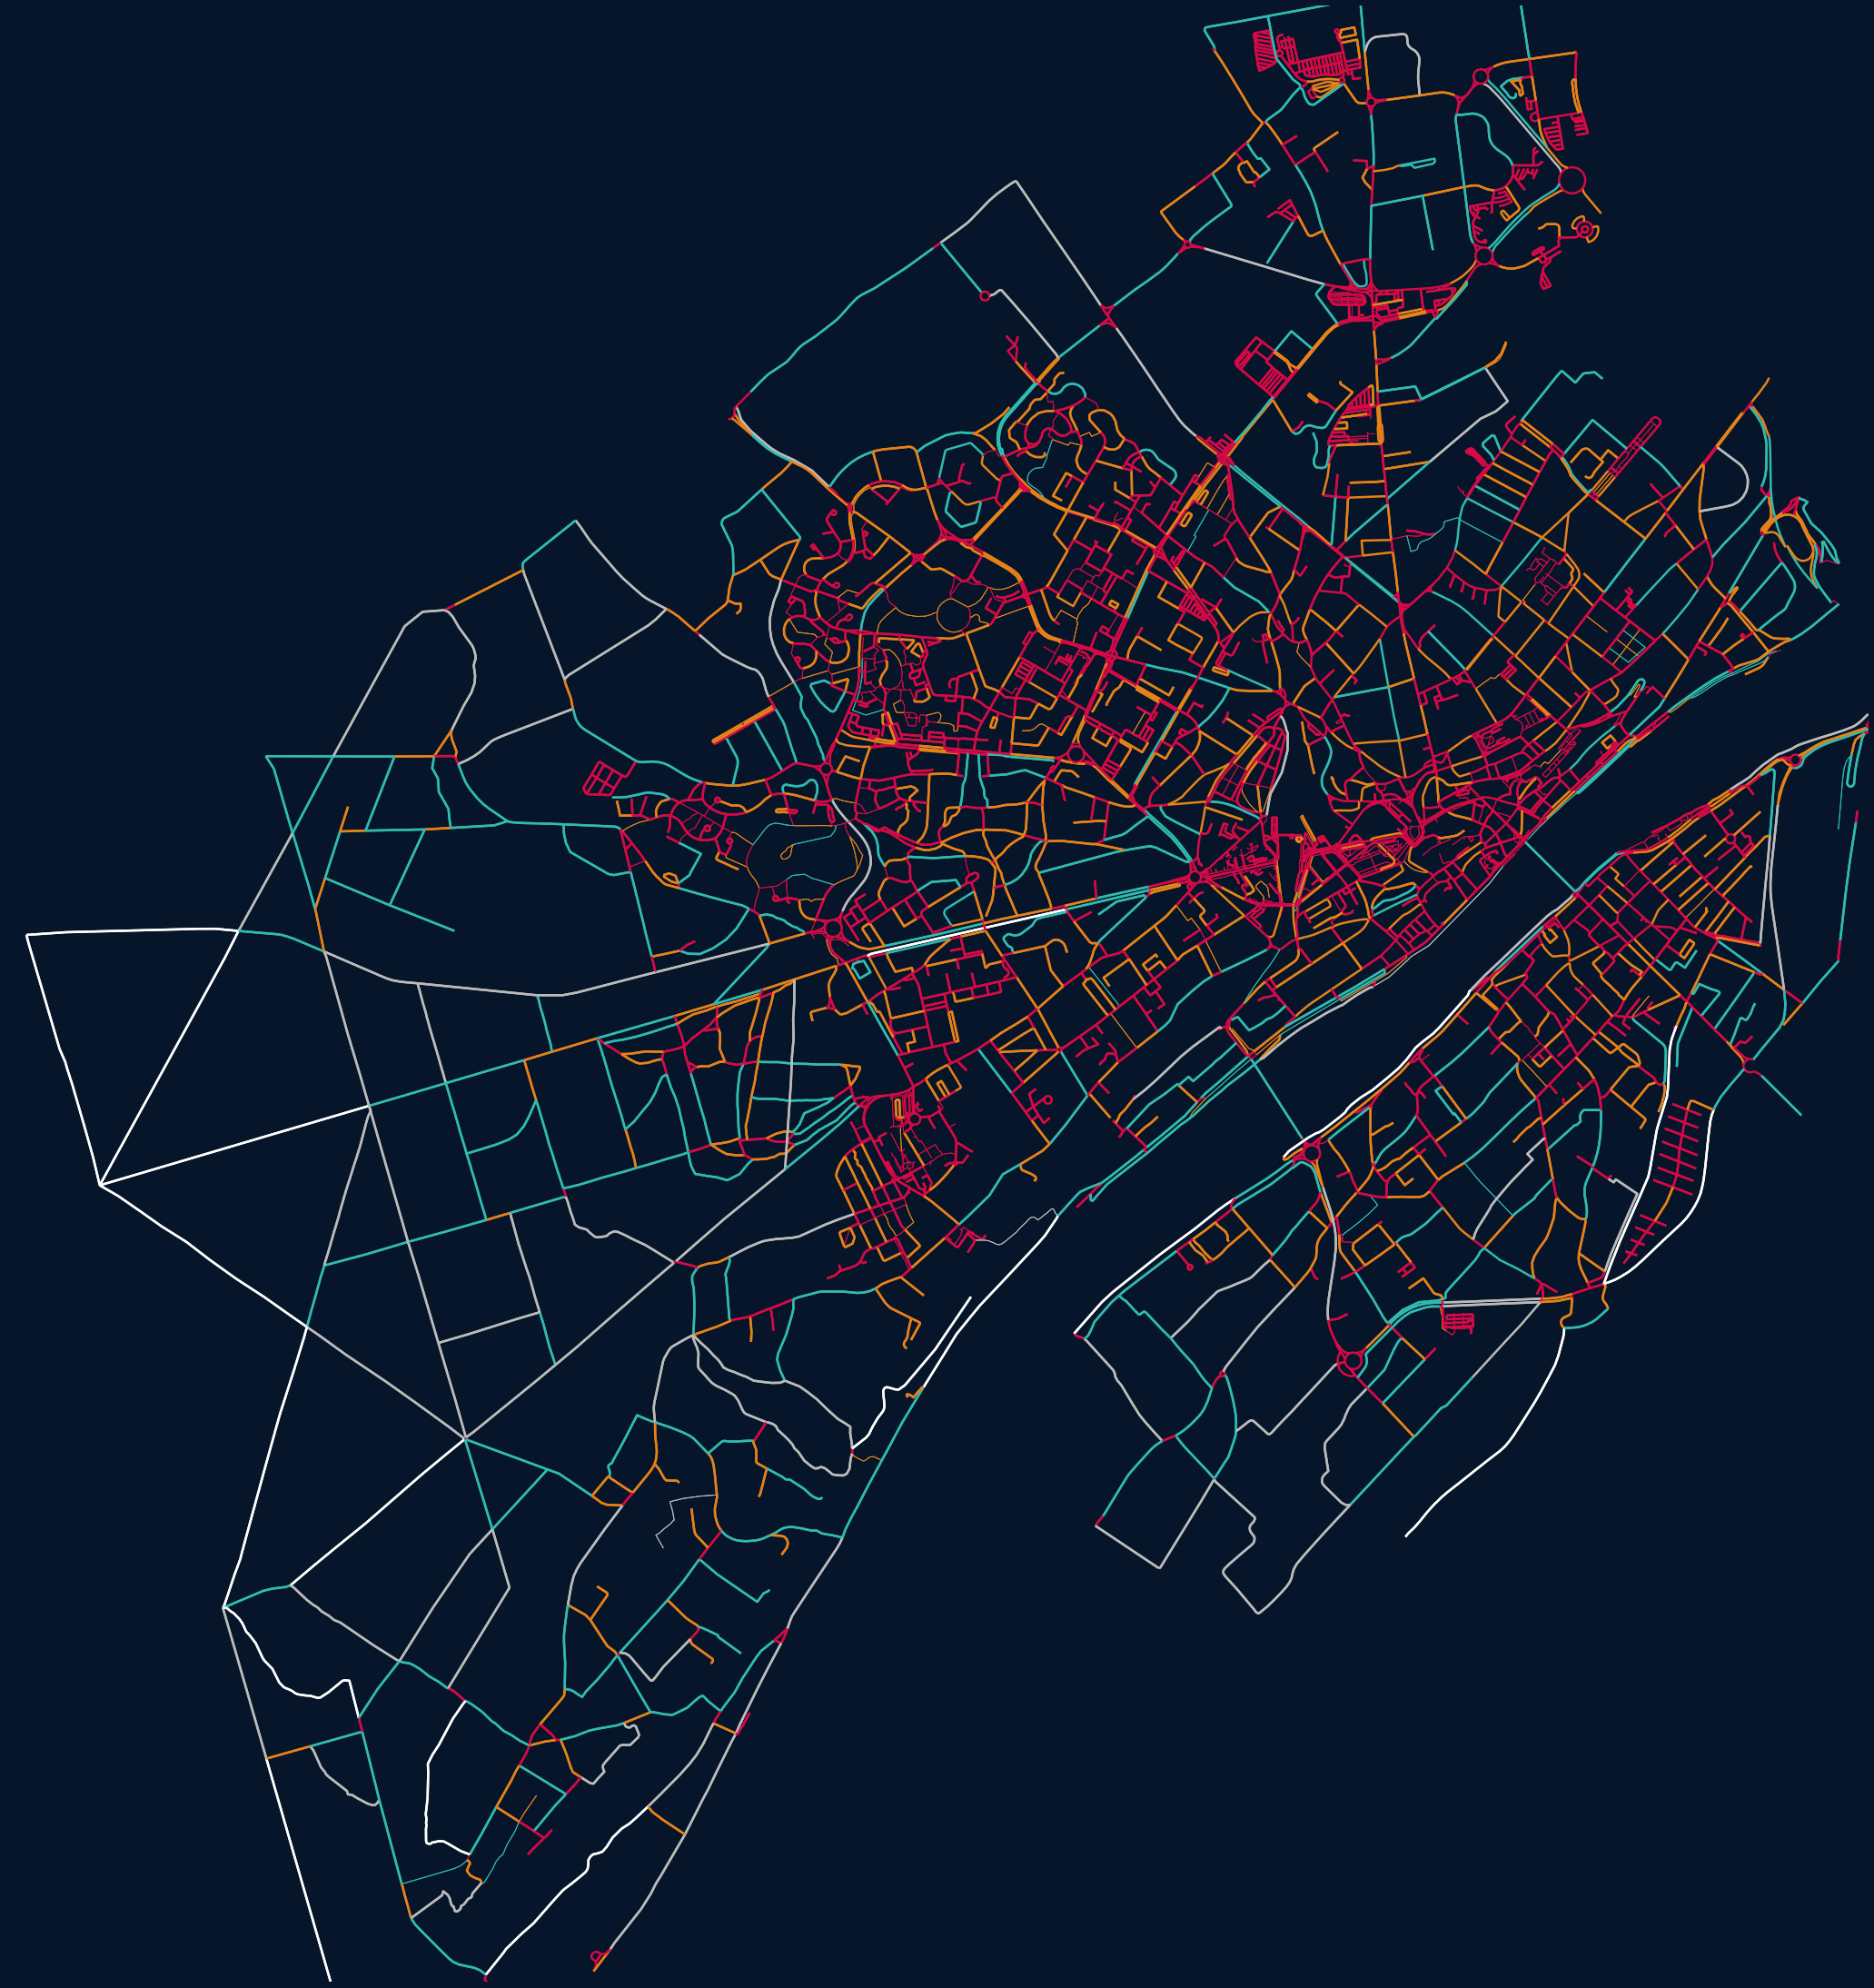

In [62]:
###############################################################################
#                                 7. Make Map                                 #
###############################################################################
# Center of map
latitude = 47.588878
longitude = 1.328002

# Bbox sides
north = latitude + 0.028
south = latitude - 0.045
east = longitude + 0.027
west = longitude - 0.075

# Make Map
fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west), margin = 0,
                        fig_height=40, fig_width=40, dpi = 300,  bgcolor = "#061529",
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)


# Text and marker size
markersize = 16
fontsize = 16

# Add legend
legend_elements = [Line2D([0], [0], marker='s', color="#061529", label= 'Longueur < 100 m',
                          markerfacecolor="#d40a47", markersize=markersize),
                          
                  Line2D([0], [0], marker='s', color="#061529", label= 'Longueur 100-200 m',
                         markerfacecolor="#e78119", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Longueur 200-400 m',
                         markerfacecolor="#30bab0", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Longueur 400-800 m',
                         markerfacecolor="#bbbbbb", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Longueur > 800 m',
                  markerfacecolor="w", markersize=markersize)]    
                      
l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor = '#061529', framealpha = 0.9,
              loc='lower right',  fontsize = fontsize, prop={'family':"Georgia", 'size':fontsize})  
  
# Legend font color
for text in l.get_texts():
    text.set_color("w")
    
# Save figure
fig.savefig("Blois.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)


In [63]:
###############################################################################
#                    8. Helper Functions: Add Border to the Map               #
###############################################################################
# Get color
def _color(color, mode):
    color = ImageColor.getcolor(color, mode)
    return color

# Expand image
def expand(image, fill = '#e0474c', bottom = 50, left = None, right = None, top = None):
    """
    Expands image
    
    Parameters
    ----------
    
    image: The image to expand.
    bottom, left, right, top: Border width, in pixels.
    param fill: Pixel fill value (a color value).  Default is 0 (black).
    
    return: An image.
    """
    
    
    if left == None:
        left = 0
    if right == None:
        right = 0
    if top == None:
        top = 0
        
    width = left + image.size[0] + right
    height = top + image.size[1] + bottom
    out = Image.new(image.mode, (width, height), _color(fill, image.mode))
    out.paste(image, (left, top))
    return out

# Add border
def add_border(input_image, output_image, fill = '#e0474c', bottom = 50, left = None, right = None, top = None):
    """ Adds border to image and saves it.
    Parameters
    ----------
    
        
    input_image: str,
        String object for the image you want to load. This is the name of the file you want to read.
    
    output_image: str,
        String object for the output image name. This is the name of the file you want to export.
    
    fill: str,
        Hex code for border color. Default is set to reddish. 
        
    bottom, left, right, top: int,
        Integer object specifying the border with in pixels.
    
    """
    
    
    if left == None:
        left = 0
    if right == None:
        right = 0
    if top == None:
        top = 0
        
    img = Image.open(input_image)
    bimg = expand(img, bottom = bottom, left = left, right = right, top = top, fill= fill)
    bimg.save(output_image)

In [64]:
###############################################################################
#                           10. Adding Text to Map                            #
###############################################################################
# Open Image
img = Image.open("Blois.png")
draw = ImageDraw.Draw(img)

# Get font from working directory. Visit https://www.wfonts.com/search?kwd=pmingliu to download fonts
font = ImageFont.truetype("PMINGLIU.ttf", 650)

# Add font: position, text, color, font
draw.text((1650,50),"Blois", (255,255,255), font=font)

# Save image
img.save('Blois.png')